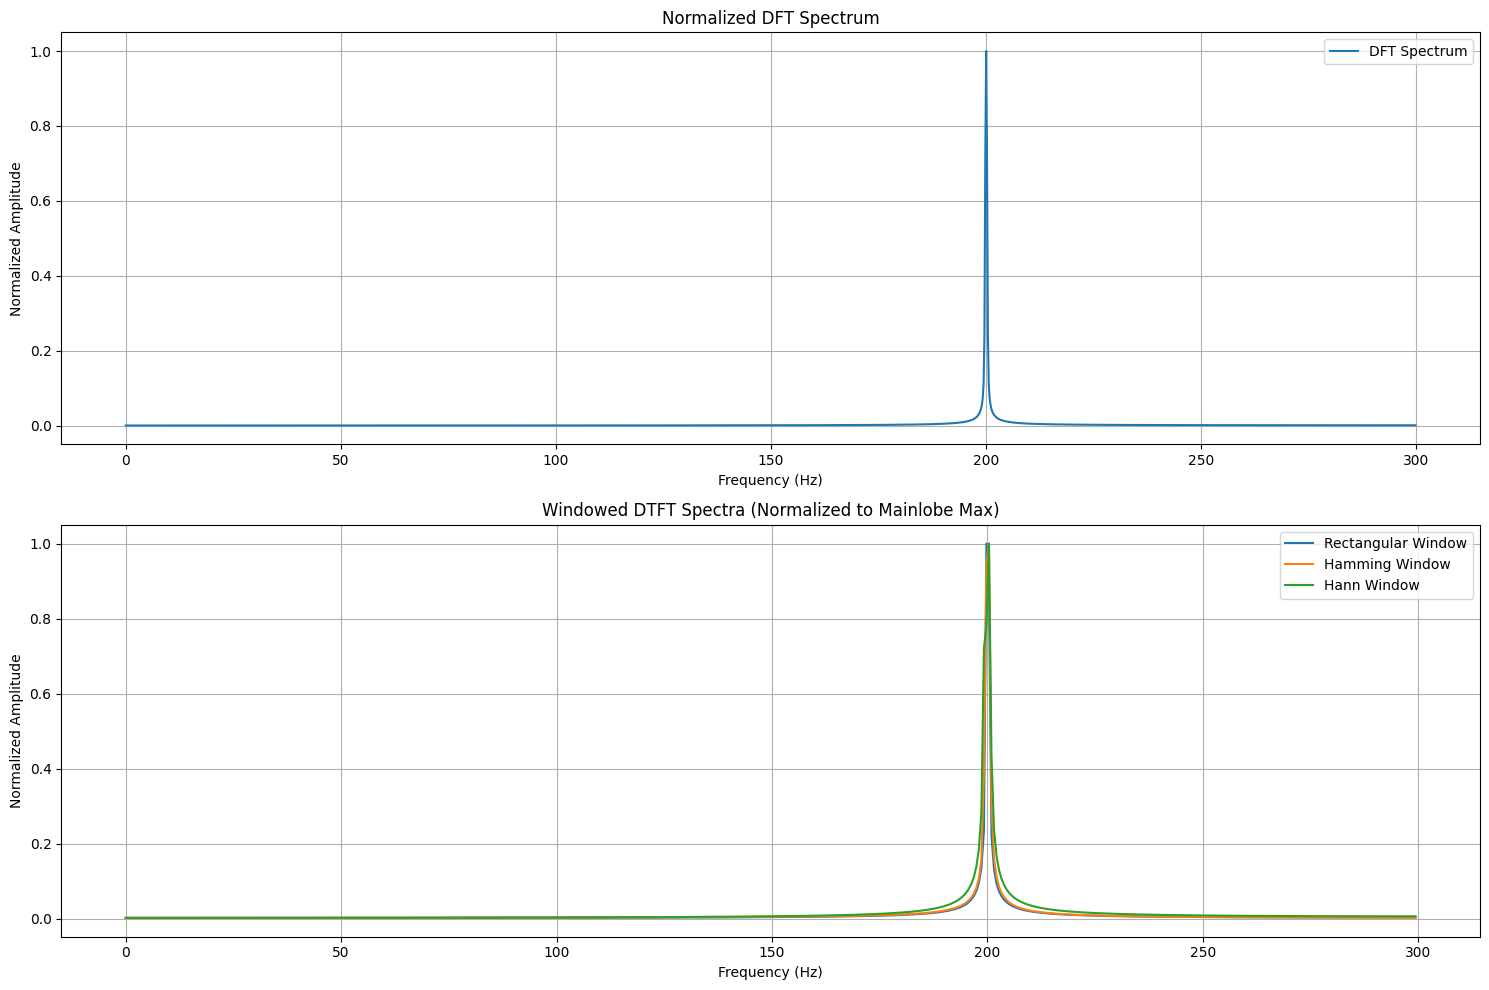

In [1]:
# Generate three sine signals of given f_1, f_2, and f_3 and amplitude |x[k]|_max for the sampling frequency f_s in the range of leq k<N.
# Variant:
# f1 f2 f3 |x[k]|max fs N
# 400 400.25 399.75 2 600 3000

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import get_window

# Parameters
f1, f2, f3 = 400, 400.25, 399.75  # Frequencies in Hz
fs = 600  # Sampling frequency in Hz
N = 3000  # Number of samples
amplitude = 2  # Maximum amplitude
t = np.arange(N) / fs # Time vector

# Generate sine signals
x1 = amplitude * np.sin(2 * np.pi * f1 * t)
x2 = amplitude * np.sin(2 * np.pi * f2 * t)
x3 = amplitude * np.sin(2 * np.pi * f3 * t)

x = x1 + x2 + x3 # Combined signal

X = np.fft.fft(x, n=N) # Compute DFT
X_normalized = np.abs(X) / np.max(np.abs(X))  # Normalize DFT
freqs = np.fft.fftfreq(N, d=1/fs)  # Frequency vector

# Windowing
windows = {
    "Rectangular": np.ones(N),
    "Hamming": get_window("hamming", N),
    "Hann": get_window("hann", N)
}

# Compute DTFT for each windowed signal
dtft_results = {}
for name, window in windows.items():
    x_windowed = x * window
    DTFT = np.fft.fft(x_windowed, n=1024)  # DTFT higher resolution
    DTFT_normalized = np.abs(DTFT) / np.max(np.abs(DTFT))  # Normalize mainlobe max
    dtft_results[name] = (DTFT_normalized, np.fft.fftfreq(1024, d=1/fs))

plt.figure(figsize=(15, 10))

# Plot normalized DFT spectra
plt.subplot(2, 1, 1)
plt.plot(freqs[:N//2], X_normalized[:N//2], label="DFT Spectrum")
plt.title("Normalized DFT Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.grid()

# Plot windowed DTFT spectra
plt.subplot(2, 1, 2)
for name, (dtft, freqs_dtft) in dtft_results.items():
    plt.plot(freqs_dtft[:512], dtft[:512], label=f"{name} Window")
plt.title("Windowed DTFT Spectra (Normalized to Mainlobe Max)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

